In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [3]:
clientes=pd.read_csv(r"C:\Users\Daniel\Desktop\Data Science\PythonDataAnalysis\OlistData\olist_customers_dataset.csv")
pedidos=pd.read_csv(r"C:\Users\Daniel\Desktop\Data Science\PythonDataAnalysis\OlistData\olist_orders_dataset.csv")
pagamentos=pd.read_csv(r"C:\Users\Daniel\Desktop\Data Science\PythonDataAnalysis\OlistData\olist_order_payments_dataset.csv")
itens=pd.read_csv(r"C:\Users\Daniel\Desktop\Data Science\PythonDataAnalysis\OlistData\olist_order_items_dataset.csv")
produtos=pd.read_csv(r"C:\Users\Daniel\Desktop\Data Science\PythonDataAnalysis\OlistData\olist_products_dataset.csv")


In [4]:
#selecione os dados da tabela de pagamentos onde só apareçam os tipos de pagamento “VOUCHER” e “BOLETO”.
pagamentos

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [5]:
#mask =(pagamentos['payment_type']=='boleto') & (pagamentos['payment_type']=='voucher')
mask=(pagamentos['payment_type']=='boleto') | (pagamentos['payment_type']=='voucher')
pagamentos[mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25559 entries, 9 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              25559 non-null  object 
 1   payment_sequential    25559 non-null  int64  
 2   payment_type          25559 non-null  object 
 3   payment_installments  25559 non-null  int64  
 4   payment_value         25559 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [6]:
mask=(pagamentos['payment_type']=='voucher')
pagamentos[mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 25 to 103860
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5775 non-null   object 
 1   payment_sequential    5775 non-null   int64  
 2   payment_type          5775 non-null   object 
 3   payment_installments  5775 non-null   int64  
 4   payment_value         5775 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 270.7+ KB


In [7]:
mask=(pagamentos['payment_type']=='boleto')
pagamentos[mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19784 entries, 9 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              19784 non-null  object 
 1   payment_sequential    19784 non-null  int64  
 2   payment_type          19784 non-null  object 
 3   payment_installments  19784 non-null  int64  
 4   payment_value         19784 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 927.4+ KB


In [17]:
5775+19784

25559

In [18]:
#retorne os campos da tabela de produtos e calcule o volume de cada produto em um novo campo
produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
bf4538d88321d0fd4412a93c974510e6,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


In [25]:
produtos.drop(['product_id'], axis=1)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_produto
product_id,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0


In [22]:
produtos['Volume_produto']=(produtos['product_length_cm']*produtos['product_height_cm']*produtos['product_width_cm'])

In [26]:
produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_produto
product_id,,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
3aa071139cb16b67ca9e5dea641aaa2f,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
96bd76ec8810374ed1b65e291975717f,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
cef67bcfe19066a932b7673e239eb23d,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
9dc1a7de274444849c219cff195d0b71,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
bf4538d88321d0fd4412a93c974510e6,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0


In [27]:
produtos.index=produtos['product_id']

In [28]:
produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_produto
product_id,,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
3aa071139cb16b67ca9e5dea641aaa2f,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
96bd76ec8810374ed1b65e291975717f,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
cef67bcfe19066a932b7673e239eb23d,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
9dc1a7de274444849c219cff195d0b71,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
bf4538d88321d0fd4412a93c974510e6,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0


In [29]:
produtos.drop(['product_id'], axis=1)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume_produto
product_id,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0


In [30]:
Volume=produtos.Volume_produto

<AxesSubplot:xlabel='product_id'>

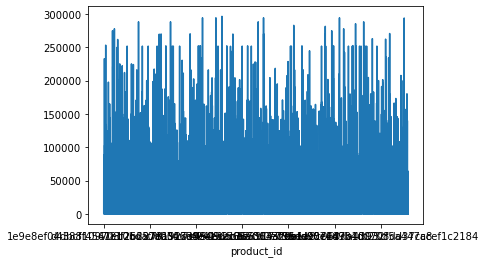

In [31]:
Volume.plot()

In [32]:
#retorne pedidos que foram feitos somente no ano de 2017
Ano2017 = pedidos['order_purchase_timestamp'].startswith('2017')

AttributeError: 'Series' object has no attribute 'startswith'

In [ ]:
Ano2017